In [1]:
import pandas
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import graphviz
import os


os.environ['PATH'] = os.environ['PATH'] + ';C:/Program Files (x86)/Graphviz2.38/bin'


plt.style.use('bmh')

datapath = '../../Data/Processed/movies.parquet'

# Leitura dos Dados 

In [2]:
df = pandas.read_parquet(datapath)

print('shape:', df.shape)
print('columns:', df.columns)

shape: (2000, 2)
columns: Index(['class', 'text'], dtype='object')


# Feature: frequência de cada palavra 

In [3]:
vectorizer = CountVectorizer(df.text.values.tolist(),
                             stop_words='english',
                             ngram_range = (1, 2),
                             min_df = 0.01,
                             max_df = 0.99,
                            )

text_counts = vectorizer.fit_transform(df.text.values.tolist())
text_counts

<2000x5118 sparse matrix of type '<class 'numpy.int64'>'
	with 386107 stored elements in Compressed Sparse Row format>

# Contador de Palavras 

Text(0.5, 0, '# Ocorrência das palavras')

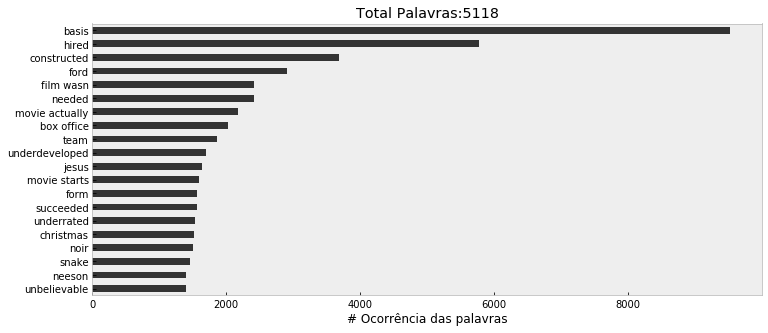

In [4]:
plt.figure(figsize=(12,5))
nshow = 20
word_count = np.asarray(text_counts.sum(axis=0))[0]

df_counts =pandas.Series(word_count)
df_counts.index = list(vectorizer.vocabulary_.keys())
df_counts.sort_values().iloc[-nshow:].plot.barh(color='#333333')

plt.grid()
plt.title('Total Palavras:'+ str(word_count.shape[0]))
plt.xlabel('# Ocorrência das palavras')

# Distribuição da contagem de palavras 

Text(0.5, 0, '# Ocorrência das palavras')

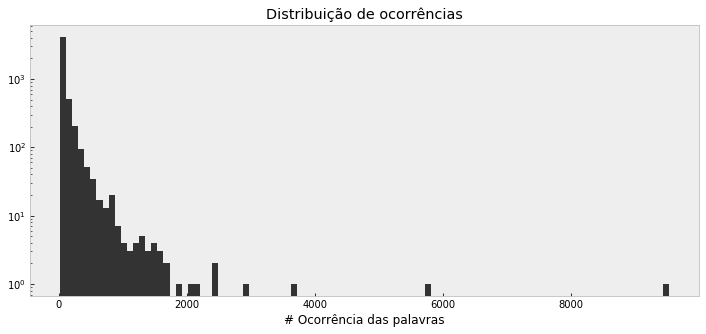

In [5]:
plt.figure(figsize=(12,5))

df_counts.hist(bins=100, color='#333333')

plt.grid()
plt.yscale('log')
plt.title('Distribuição de ocorrências')
plt.xlabel('# Ocorrência das palavras')

# Distribuição por classe 

Text(0.5, 1.0, 'Proporção Por Classe')

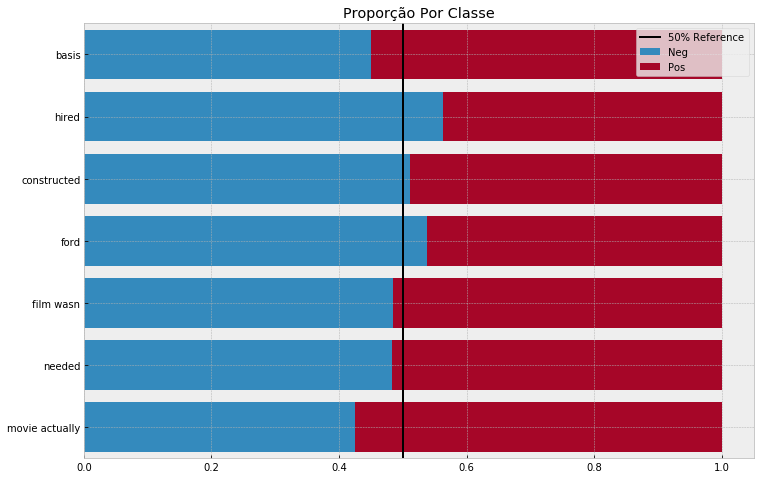

In [6]:
plt.figure(figsize=(12,8))

nshow=7

idx = (df['class'] == 'Pos').values
word_count_neg = np.asarray(text_counts[~idx].mean(axis=0))[0]
word_count_pos = np.asarray(text_counts[ idx].mean(axis=0))[0]
idx = np.argsort(word_count)[-nshow:]
vocabulary = np.array(list(vectorizer.vocabulary_.keys()))[idx].tolist()
yaxis = np.arange(nshow)

total_count = word_count_neg + word_count_pos

bar_neg = plt.barh(yaxis, word_count_neg[idx] / total_count[idx], label='Neg')
bar_pos = plt.barh(yaxis, word_count_pos[idx] / total_count[idx],
                   left=word_count_neg[idx] / total_count[idx], label='Pos')

plt.plot([0.5, 0.5],[-0.5, nshow], '-k', label='50% Reference')
plt.yticks(yaxis, vocabulary)
plt.legend()
plt.ylim((-0.5, nshow-0.5))

plt.title('Proporção Por Classe')


# Normalização por Tf-Idf  

In [7]:
vectorizer = TfidfVectorizer(df.text.values.tolist(),
                             stop_words='english',
                             ngram_range = (1, 2),
                             min_df = 0.05,
                             max_df = 0.95)

text_features = vectorizer.fit_transform(df.text.values.tolist())
vocabulary = list(vectorizer.vocabulary_.keys())
text_features

<2000x903 sparse matrix of type '<class 'numpy.float64'>'
	with 215753 stored elements in Compressed Sparse Row format>

# Distribuição Percentual 

Text(0.5, 1.0, 'Proporção Por Classe')

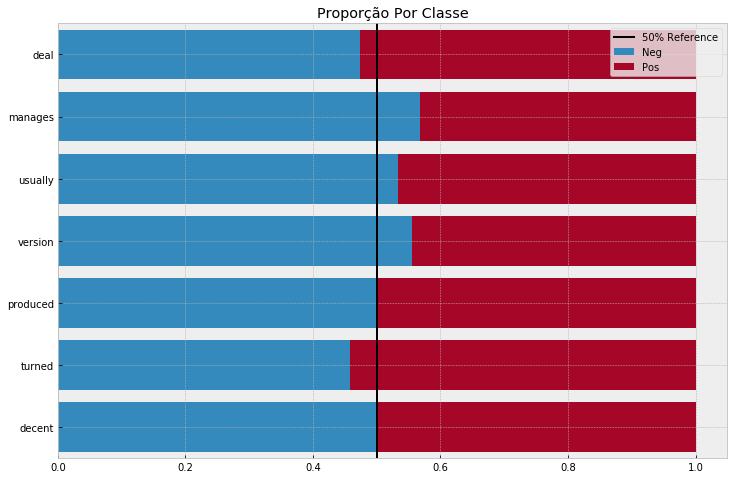

In [8]:
plt.figure(figsize=(12,8))

nshow=7

idx = (df['class'] == 'Pos').values
word_count = np.asarray(text_features.mean(axis=0))[0]
word_count_neg = np.asarray(text_features[~idx].mean(axis=0))[0]
word_count_pos = np.asarray(text_features[ idx].mean(axis=0))[0]
idx = np.argsort(word_count)[-nshow:]
vocabulary = np.array(list(vectorizer.vocabulary_.keys()))[idx].tolist()
yaxis = np.arange(nshow)

total_count = word_count_neg + word_count_pos

bar_neg = plt.barh(yaxis, word_count_neg[idx] / total_count[idx], label='Neg')
bar_pos = plt.barh(yaxis, word_count_pos[idx] / total_count[idx],
                   left=word_count_neg[idx] / total_count[idx], label='Pos')

plt.plot([0.5, 0.5],[-0.5, nshow], '-k', label='50% Reference')
plt.yticks(yaxis, vocabulary)
plt.legend()
plt.ylim((-0.5, nshow-0.5))

plt.title('Proporção Por Classe')


# Distribuição do TfIdf Médio por Classe 

Text(0.5, 0, 'TfIdf médio')

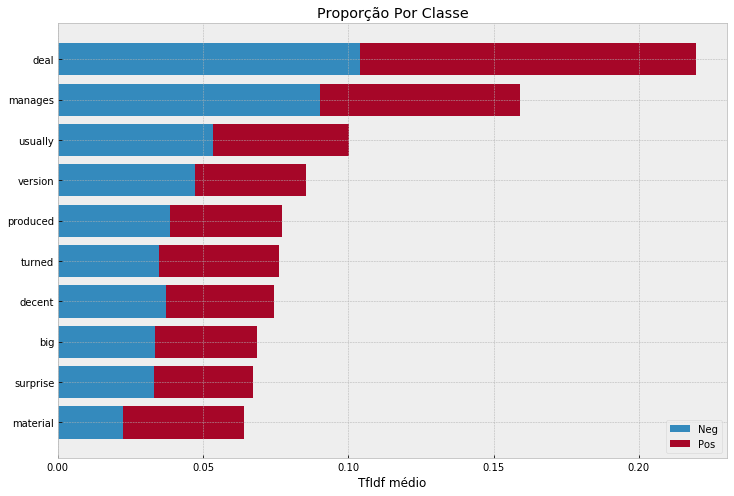

In [21]:
plt.figure(figsize=(12,8))


nshow = 10

idx = (df['class'] == 'Pos').values
word_mean     = np.asarray(text_features.mean(axis=0))[0]
word_mean_neg = np.asarray(text_features[~idx].mean(axis=0))[0]
word_mean_pos = np.asarray(text_features[ idx].mean(axis=0))[0]
idx = np.argsort(word_mean)[-nshow:]
vocabulary = np.array(list(vectorizer.vocabulary_.keys()))[idx].tolist()
yaxis = np.arange(nshow)

bar_neg = plt.barh(yaxis, word_mean_neg[idx], label='Neg')
bar_pos = plt.barh(yaxis, word_mean_pos[idx], left=word_mean_neg[idx], label='Pos')
plt.yticks(yaxis, vocabulary)

plt.legend()
plt.title('Proporção Por Classe')
plt.xlabel('TfIdf médio')


# Diferença TfIDf por Palavra 

Text(0.5, 0, 'TfIdf médio')

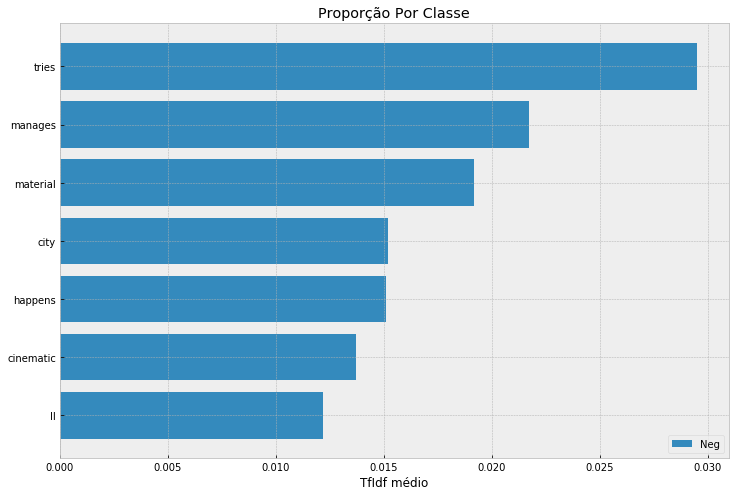

In [10]:
plt.figure(figsize=(12,8))

idx = (df['class'] == 'Pos').values
word_mean_neg = np.asarray(text_features[~idx].mean(axis=0))[0]
word_mean_pos = np.asarray(text_features[ idx].mean(axis=0))[0]
word_mean_diff = np.abs(word_mean_pos - word_mean_neg)

idx = np.argsort(word_mean_diff)[-nshow:]
vocabulary = np.array(list(vectorizer.vocabulary_.keys()))[idx].tolist()
yaxis = np.arange(nshow)

plt.barh(yaxis, word_mean_diff[idx], label='Neg')
plt.yticks(yaxis, vocabulary)

plt.legend()
plt.title('Proporção Por Classe')
plt.xlabel('TfIdf médio')


# Distribuição do TfIdf Médio das Palavras 

Text(0.5, 0, '# TfIdf das palavras')

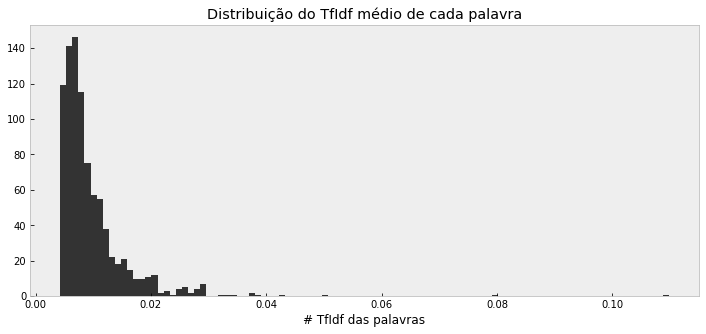

In [11]:
plt.figure(figsize=(12,5))

word_mean     = np.asarray(text_features.mean(axis=0))[0]

df_tfidf =pandas.Series(word_mean)
df_tfidf.index = list(vectorizer.vocabulary_.keys())
df_tfidf.hist(bins=100, color='#333333')




plt.grid()
plt.title('Distribuição do TfIdf médio de cada palavra')
plt.xlabel('# TfIdf das palavras')

# Distribuição do TfIdf por Classe 

Text(0.5, 0, 'TfIdf médio')

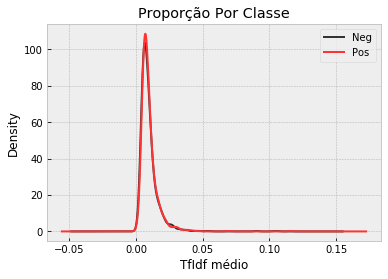

In [16]:
plt.figure(figsize=(6,4))

idx = (df['class'] == 'Pos').values
word_mean     = np.asarray(text_features.mean(axis=0))[0]
word_mean_neg = np.asarray(text_features[~idx].mean(axis=0))[0]
word_mean_pos = np.asarray(text_features[ idx].mean(axis=0))[0]


df_tfidf =pandas.Series(word_mean_neg)
df_tfidf.index = list(vectorizer.vocabulary_.keys()).copy()
df_tfidf.plot.kde(color='#333333', label='Neg')

df_tfidf =pandas.Series(word_mean_pos)
df_tfidf.index = list(vectorizer.vocabulary_.keys()).copy()
df_tfidf.plot.kde(color='#FF3333', label='Pos')


plt.legend()
plt.title('Proporção Por Classe')
plt.xlabel('TfIdf médio')


# Preliminar Results 

In [17]:
from sklearn import tree 
from sklearn import metrics

model = tree.DecisionTreeClassifier(max_depth=10)

Y = df['class'].values
model.fit(text_features, Y)
Ydec = model.predict(text_features)
print(metrics.classification_report(Y, Ydec))

              precision    recall  f1-score   support

         Neg       0.90      0.80      0.85      1000
         Pos       0.82      0.92      0.86      1000

   micro avg       0.86      0.86      0.86      2000
   macro avg       0.86      0.86      0.85      2000
weighted avg       0.86      0.86      0.85      2000



## Importância das Features 

Text(0.5, 1.0, 'Importância das Palavras')

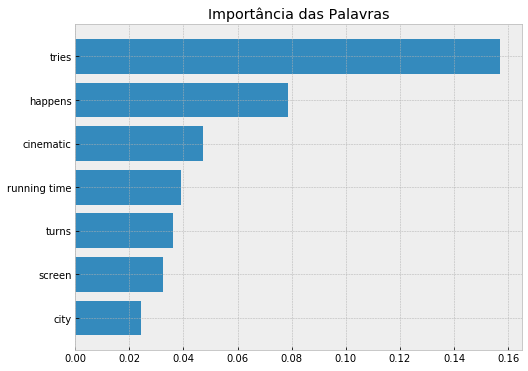

In [19]:
plt.figure(figsize=(8,6))


idx = np.argsort(model.feature_importances_)[-nshow:]
yaxis = np.arange(nshow)

plt.barh(yaxis, model.feature_importances_[idx])
plt.yticks(yaxis,np.array(list(vectorizer.vocabulary_.keys()))[idx])


plt.title('Importância das Palavras')

## Visualização da Árvore 

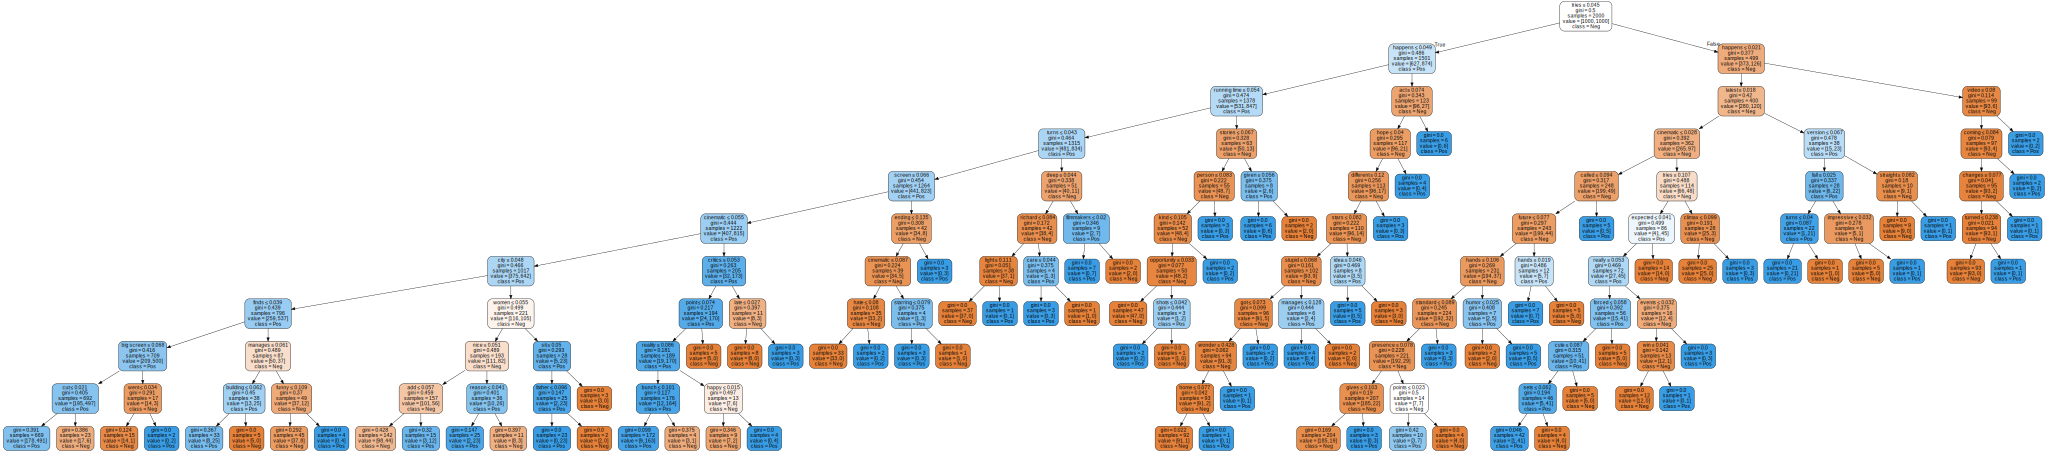

In [20]:
dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=list(vectorizer.vocabulary_.keys()), 
                      class_names=model.classes_,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph